In [1]:
!pip install pulp
from pulp import *
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [0]:
#!{sys.executable} -m pip install xlrd

# Importing the dataset

In [3]:
df = pd.read_excel("openfoodfacts_simplified_database.xlsx")
df = df[~df['nutrition_grade_fr'].isna()]
df['nutrition_grade_fr'].describe()

count     5925
unique       5
top          d
freq      1599
Name: nutrition_grade_fr, dtype: object

In [0]:
# df['pnns_groups_1'].unique()

In [0]:
# df = df[df['pnns_groups_1'] == 'Milk and dairy products']
# df = df[df['pnns_groups_2'] == 'Cheese']
# df['pnns_groups_2'].unique()

In [6]:
cols = ['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g', 'nutrition_grade_fr']
df = df[cols]
df.columns = ['energy', 'saturated_fat', 'sugars', 'fiber', 'proteins', 'salt', 'nutriscore']
df.head()

,energy,saturated_fat,sugars,fiber,proteins,salt,nutriscore
0,590.0,0.5,5.5,1.8,6.2,0.236,b
3,1477.0,1.5,10.0,9.9,5.4,2.200,b
4,176.0,0.0,9.7,0.0,0.5,0.000,c
8,1022.0,1.9,0.5,1.4,12.0,0.332,b
9,196.0,0.0,11.0,0.5,0.7,0.040,c


In [0]:
df = df[~df['energy'].isna()]
df = df[~df['saturated_fat'].isna()]
df = df[~df['sugars'].isna()]
df = df[~df['fiber'].isna()]
df = df[~df['proteins'].isna()]
df = df[~df['salt'].isna()]

In [0]:
max_energy = df['energy'].max()
min_energy = df['energy'].min()

max_saturated_fat = df['saturated_fat'].max()
min_saturated_fat = df['saturated_fat'].min()

max_sugars = df['sugars'].max()
min_sugars = df['sugars'].min()

max_fiber = df['fiber'].max()
min_fiber = df['fiber'].min()

max_proteins = df['proteins'].max()
min_proteins = df['proteins'].min()

max_salt = df['salt'].max()
min_salt = df['salt'].min()

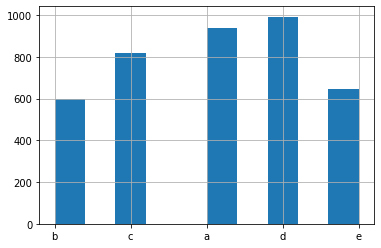

In [9]:
df['nutriscore'].hist()

In [0]:
df['nutriscore'] = np.where(df['nutriscore']=='a', 5, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='b', 4, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='c', 3, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='d', 2, df['nutriscore'])
df['nutriscore'] = np.where(df['nutriscore']=='e', 1, df['nutriscore'])

In [11]:
print(df[df['nutriscore'] == 1]['energy'].max(), df[df['nutriscore'] == 1]['energy'].min(), df[df['nutriscore'] == 1]['energy'].mean(), df[df['nutriscore'] == 1]['energy'].std())
print(df[df['nutriscore'] == 2]['energy'].max(), df[df['nutriscore'] == 2]['energy'].min(), df[df['nutriscore'] == 2]['energy'].mean(), df[df['nutriscore'] == 2]['energy'].std())
print(df[df['nutriscore'] == 3]['energy'].max(), df[df['nutriscore'] == 3]['energy'].min(), df[df['nutriscore'] == 3]['energy'].mean(), df[df['nutriscore'] == 3]['energy'].std())
print(df[df['nutriscore'] == 4]['energy'].max(), df[df['nutriscore'] == 4]['energy'].min(), df[df['nutriscore'] == 4]['energy'].mean(), df[df['nutriscore'] == 4]['energy'].std())
print(df[df['nutriscore'] == 5]['energy'].max(), df[df['nutriscore'] == 5]['energy'].min(), df[df['nutriscore'] == 5]['energy'].mean(), df[df['nutriscore'] == 5]['energy'].std())

7510.0 117.0 1918.4272445820434 682.5797509477326
3698.0 0.0 1414.8306451612902 595.0981548225855
3464.0 0.0 984.2051282051282 679.4650271736979
2920.0 0.0 678.0013333333333 514.6467395302051
2575.0 0.0 643.7117270788913 561.4347337942038


In [12]:
print(df[df['nutriscore'] == 1]['saturated_fat'].max(), df[df['nutriscore'] == 1]['saturated_fat'].min(), df[df['nutriscore'] == 1]['saturated_fat'].mean(), df[df['nutriscore'] == 1]['saturated_fat'].std())
print(df[df['nutriscore'] == 2]['saturated_fat'].max(), df[df['nutriscore'] == 2]['saturated_fat'].min(), df[df['nutriscore'] == 2]['saturated_fat'].mean(), df[df['nutriscore'] == 2]['saturated_fat'].std())
print(df[df['nutriscore'] == 3]['saturated_fat'].max(), df[df['nutriscore'] == 3]['saturated_fat'].min(), df[df['nutriscore'] == 3]['saturated_fat'].mean(), df[df['nutriscore'] == 3]['saturated_fat'].std())
print(df[df['nutriscore'] == 4]['saturated_fat'].max(), df[df['nutriscore'] == 4]['saturated_fat'].min(), df[df['nutriscore'] == 4]['saturated_fat'].mean(), df[df['nutriscore'] == 4]['saturated_fat'].std())
print(df[df['nutriscore'] == 5]['saturated_fat'].max(), df[df['nutriscore'] == 5]['saturated_fat'].min(), df[df['nutriscore'] == 5]['saturated_fat'].mean(), df[df['nutriscore'] == 5]['saturated_fat'].std())

100.0 0.0 15.454705882352949 11.523354465190025
42.0 0.0 7.210897177419362 6.454610278407766
60.0 0.0 2.8419413919413934 4.201056278455641
8.9 0.0 1.2675683333333334 1.2244226694458804
6.2 0.0 0.4827775053304908 0.6704036313106108


In [13]:
print(df[df['nutriscore'] == 1]['sugars'].max(), df[df['nutriscore'] == 1]['sugars'].min(), df[df['nutriscore'] == 1]['sugars'].mean(), df[df['nutriscore'] == 1]['sugars'].std())
print(df[df['nutriscore'] == 2]['sugars'].max(), df[df['nutriscore'] == 2]['sugars'].min(), df[df['nutriscore'] == 2]['sugars'].mean(), df[df['nutriscore'] == 2]['sugars'].std())
print(df[df['nutriscore'] == 3]['sugars'].max(), df[df['nutriscore'] == 3]['sugars'].min(), df[df['nutriscore'] == 3]['sugars'].mean(), df[df['nutriscore'] == 3]['sugars'].std())
print(df[df['nutriscore'] == 4]['sugars'].max(), df[df['nutriscore'] == 4]['sugars'].min(), df[df['nutriscore'] == 4]['sugars'].mean(), df[df['nutriscore'] == 4]['sugars'].std())
print(df[df['nutriscore'] == 5]['sugars'].max(), df[df['nutriscore'] == 5]['sugars'].min(), df[df['nutriscore'] == 5]['sugars'].mean(), df[df['nutriscore'] == 5]['sugars'].std())

84.0 0.0 28.28348297213622 19.799645939333487
100.0 0.0 15.136774294354842 18.257789857051566
71.0 0.0 9.192344322344333 12.860959094292403
67.0 0.0 5.066904999999999 8.28770104937318
37.0 0.0 3.6324946727078844 4.473808247513058


In [14]:
print(df[df['nutriscore'] == 1]['fiber'].max(), df[df['nutriscore'] == 1]['fiber'].min(), df[df['nutriscore'] == 1]['fiber'].mean(), df[df['nutriscore'] == 1]['fiber'].std(), df[df['nutriscore'] == 1]['fiber'].mean() + df[df['nutriscore'] == 1]['fiber'].std())
print(df[df['nutriscore'] == 2]['fiber'].max(), df[df['nutriscore'] == 2]['fiber'].min(), df[df['nutriscore'] == 2]['fiber'].mean(), df[df['nutriscore'] == 2]['fiber'].std(), df[df['nutriscore'] == 2]['fiber'].mean() + df[df['nutriscore'] == 2]['fiber'].std())
print(df[df['nutriscore'] == 3]['fiber'].max(), df[df['nutriscore'] == 3]['fiber'].min(), df[df['nutriscore'] == 3]['fiber'].mean(), df[df['nutriscore'] == 3]['fiber'].std(), df[df['nutriscore'] == 3]['fiber'].mean() + df[df['nutriscore'] == 3]['fiber'].std())
print(df[df['nutriscore'] == 4]['fiber'].max(), df[df['nutriscore'] == 4]['fiber'].min(), df[df['nutriscore'] == 4]['fiber'].mean(), df[df['nutriscore'] == 4]['fiber'].std(), df[df['nutriscore'] == 4]['fiber'].mean() + df[df['nutriscore'] == 4]['fiber'].std())
print(df[df['nutriscore'] == 5]['fiber'].max(), df[df['nutriscore'] == 5]['fiber'].min(), df[df['nutriscore'] == 5]['fiber'].mean(), df[df['nutriscore'] == 5]['fiber'].std(), df[df['nutriscore'] == 5]['fiber'].mean() + df[df['nutriscore'] == 5]['fiber'].std())

23.0 0.0 2.2782352941176467 2.3985778694288107 4.676813163546457
41.0 0.0 2.2508972782258043 3.0011460393133604 5.252043317539165
27.0 0.0 2.4200708180708164 2.8043261462146223 5.224396964285439
12.8 0.0 2.123516666666667 2.2188552598496574 4.342371926516325
47.8 0.0 3.7477484008528803 4.160338401162896 7.908086802015776


In [15]:
print(df[df['nutriscore'] == 1]['proteins'].max(), df[df['nutriscore'] == 1]['proteins'].min(), df[df['nutriscore'] == 1]['proteins'].mean(), df[df['nutriscore'] == 1]['proteins'].std(), df[df['nutriscore'] == 1]['proteins'].mean() + df[df['nutriscore'] == 1]['proteins'].std())
print(df[df['nutriscore'] == 2]['proteins'].max(), df[df['nutriscore'] == 2]['proteins'].min(), df[df['nutriscore'] == 2]['proteins'].mean(), df[df['nutriscore'] == 2]['proteins'].std(), df[df['nutriscore'] == 2]['proteins'].mean() + df[df['nutriscore'] == 2]['proteins'].std())
print(df[df['nutriscore'] == 3]['proteins'].max(), df[df['nutriscore'] == 3]['proteins'].min(), df[df['nutriscore'] == 3]['proteins'].mean(), df[df['nutriscore'] == 3]['proteins'].std(), df[df['nutriscore'] == 3]['proteins'].mean() + df[df['nutriscore'] == 3]['proteins'].std())
print(df[df['nutriscore'] == 4]['proteins'].max(), df[df['nutriscore'] == 4]['proteins'].min(), df[df['nutriscore'] == 4]['proteins'].mean(), df[df['nutriscore'] == 4]['proteins'].std(), df[df['nutriscore'] == 4]['proteins'].mean() + df[df['nutriscore'] == 4]['proteins'].std())
print(df[df['nutriscore'] == 5]['proteins'].max(), df[df['nutriscore'] == 5]['proteins'].min(), df[df['nutriscore'] == 5]['proteins'].mean(), df[df['nutriscore'] == 5]['proteins'].std(), df[df['nutriscore'] == 5]['proteins'].mean() + df[df['nutriscore'] == 5]['proteins'].std())

33.3 0.0 7.446687306501548 6.315374977154655 13.762062283656203
41.0 0.0 10.000453629032265 8.349511444879901 18.349965073912166
29.0 0.0 7.215140415140413 6.57354063669378 13.788681051834192
27.0 0.0 6.515533333333333 5.512884472539595 12.028417805872927
32.0 0.0 6.353315565031989 5.851187182951755 12.204502747983744


In [16]:
print(df[df['nutriscore'] == 1]['salt'].max(), df[df['nutriscore'] == 1]['salt'].min(), df[df['nutriscore'] == 1]['salt'].mean(), df[df['nutriscore'] == 1]['salt'].std())
print(df[df['nutriscore'] == 2]['salt'].max(), df[df['nutriscore'] == 2]['salt'].min(), df[df['nutriscore'] == 2]['salt'].mean(), df[df['nutriscore'] == 2]['salt'].std())
print(df[df['nutriscore'] == 3]['salt'].max(), df[df['nutriscore'] == 3]['salt'].min(), df[df['nutriscore'] == 3]['salt'].mean(), df[df['nutriscore'] == 3]['salt'].std())
print(df[df['nutriscore'] == 4]['salt'].max(), df[df['nutriscore'] == 4]['salt'].min(), df[df['nutriscore'] == 4]['salt'].mean(), df[df['nutriscore'] == 4]['salt'].std())
print(df[df['nutriscore'] == 5]['salt'].max(), df[df['nutriscore'] == 5]['salt'].min(), df[df['nutriscore'] == 5]['salt'].mean(), df[df['nutriscore'] == 5]['salt'].std())

8.0 0.0 0.3898036928792569 0.6396938718702941
8.0 0.0 0.49610492491028246 0.5871957450532012
19.52 0.0 0.4413781167277166 0.8477457611061571
2.64 0.0 0.29509828533333354 0.2516661428052885
5.2 0.0 0.15859644190831593 0.22964358363603268


In [0]:
# Normalize the energy column
df['energy'] = (df['energy']-min_energy) / (max_energy-min_energy)*100

# Split the dataset

In [0]:
features = ['energy', 'proteins', 'salt', 'fiber', 'saturated_fat', 'sugars']
X = df[features]
y = df[['nutriscore']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
df = X_train
df['nutriscore'] = y_train['nutriscore']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
df.count()[0]

3196

In [22]:
test_df = X_test
test_df['nutriscore'] = y_test['nutriscore']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
test_df.count()[0]

799

# Formalize the problem

In [24]:
prob = LpProblem("The Nutriscore", LpMinimize)

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1137: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [0]:
pi = []
pi.append([
           LpVariable('pi_1_energy', 0, 100),
           LpVariable('pi_1_saturated_fat', 0, 100),
           LpVariable('pi_1_sugars', 0, 100),
           LpVariable('pi_1_fiber', 0, 100),
           LpVariable('pi_1_proteins', 0, 100),
           LpVariable('pi_1_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_2_energy', 0, 100),
           LpVariable('pi_2_saturated_fat', 0, 100),
           LpVariable('pi_2_sugars', 0, 100),
           LpVariable('pi_2_fiber', 0, 100),
           LpVariable('pi_2_proteins', 0, 100),
           LpVariable('pi_2_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_3_energy', 0, 100),
           LpVariable('pi_3_saturated_fat', 0, 100),
           LpVariable('pi_3_sugars', 0, 100),
           LpVariable('pi_3_fiber', 0, 100),
           LpVariable('pi_3_proteins', 0, 100),
           LpVariable('pi_3_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_4_energy', 0, 100),
           LpVariable('pi_4_saturated_fat', 0, 100),
           LpVariable('pi_4_sugars', 0, 100),
           LpVariable('pi_4_fiber', 0, 100),
           LpVariable('pi_4_proteins', 0, 100),
           LpVariable('pi_4_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_5_energy', 0, 100),
           LpVariable('pi_5_saturated_fat', 0, 100),
           LpVariable('pi_5_sugars', 0, 100),
           LpVariable('pi_5_fiber', 0, 100),
           LpVariable('pi_5_proteins', 0, 100),
           LpVariable('pi_5_salt', 0, 100),
           ])
pi.append([
           LpVariable('pi_6_energy', 0, 100),
           LpVariable('pi_6_saturated_fat', 0, 100),
           LpVariable('pi_6_sugars', 0, 100),
           LpVariable('pi_6_fiber', 0, 100),
           LpVariable('pi_6_proteins', 0, 100),
           LpVariable('pi_6_salt', 0, 100),
           ])

In [0]:
# Error to minimize
eps = {}

for index, food in df.iterrows():
  eps[index] = []

  eps[index].append([
            LpVariable('eps_' + str(index) + '_1_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_1_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_1_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_1_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_1_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_1_salt', 0, 100),
            ])
  eps[index].append([
            LpVariable('eps_' + str(index) + '_2_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_2_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_2_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_2_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_2_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_2_salt', 0, 100),
            ])
  eps[index].append([
            LpVariable('eps_' + str(index) + '_3_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_3_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_3_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_3_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_3_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_3_salt', 0, 100),
            ])
  eps[index].append([
            LpVariable('eps_' + str(index) + '_4_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_4_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_4_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_4_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_4_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_4_salt', 0, 100),
            ])
  eps[index].append([
            LpVariable('eps_' + str(index) + '_5_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_5_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_5_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_5_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_5_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_5_salt', 0, 100),
            ])
  eps[index].append([
            LpVariable('eps_' + str(index) + '_6_energy', 0, 100),
            LpVariable('eps_' + str(index) + '_6_saturated_fat', 0, 100),
            LpVariable('eps_' + str(index) + '_6_sugars', 0, 100),
            LpVariable('eps_' + str(index) + '_6_fiber', 0, 100),
            LpVariable('eps_' + str(index) + '_6_proteins', 0, 100),
            LpVariable('eps_' + str(index) + '_6_salt', 0, 100),
            ])

In [0]:
eps_flattened = list(itertools.chain.from_iterable(list(itertools.chain.from_iterable(eps.values()))))

prob += lpSum(eps_flattened), "Minimize the error in the thresholds"

In [0]:
for index, food in df.iterrows():
  score = food['nutriscore']
  pi_lower = score-1
  pi_upper = score
  prob += (food['energy'] <= pi[pi_lower][0] + eps[index][pi_lower][0])
  prob += (food['energy'] >= pi[pi_upper][0] - eps[index][pi_upper][0])
  prob += (food['saturated_fat'] <= pi[pi_lower][1] + eps[index][pi_lower][1])
  prob += (food['saturated_fat'] >= pi[pi_upper][1] - eps[index][pi_upper][1])
  prob += (food['sugars'] <= pi[pi_lower][2] + eps[index][pi_lower][2])
  prob += (food['sugars'] >= pi[pi_upper][2] - eps[index][pi_upper][2])
  prob += (food['fiber'] >= pi[pi_lower][3] - eps[index][pi_lower][3])
  prob += (food['fiber'] <= pi[pi_upper][3] + eps[index][pi_upper][3])
  prob += (food['proteins'] >= pi[pi_lower][4] - eps[index][pi_lower][4])
  prob += (food['proteins'] <= pi[pi_upper][4] + eps[index][pi_upper][4])
  prob += (food['salt'] <= pi[pi_lower][5] + eps[index][pi_lower][5])
  prob += (food['salt'] >= pi[pi_upper][5] - eps[index][pi_upper][5])

In [0]:
prob += (pi[0][0] == 100)
prob += (pi[0][1] == 100)
prob += (pi[0][2] == 100)
prob += (pi[0][3] == 0)
prob += (pi[0][4] == 0)
prob += (pi[0][5] == 100)

prob += (pi[5][0] == 0)
prob += (pi[5][1] == 0)
prob += (pi[5][2] == 0)
prob += (pi[5][3] == 100)
prob += (pi[5][4] == 100)
prob += (pi[5][5] == 0)

In [0]:
prob += (pi[0][0] >= pi[1][0]+1)
prob += (pi[1][0] >= pi[2][0]+1)
prob += (pi[2][0] >= pi[3][0]+1)
prob += (pi[3][0] >= pi[4][0]+1)
prob += (pi[4][0] >= pi[5][0]+1)

prob += (pi[0][1] >= pi[1][1]+1)
prob += (pi[1][1] >= pi[2][1]+1)
prob += (pi[2][1] >= pi[3][1]+1)
prob += (pi[3][1] >= pi[4][1]+1)
prob += (pi[4][1] >= pi[5][1]+1)

prob += (pi[0][2] >= pi[1][2]+1)
prob += (pi[1][2] >= pi[2][2]+1)
prob += (pi[2][2] >= pi[3][2]+1)
prob += (pi[3][2] >= pi[4][2]+1)
prob += (pi[4][2] >= pi[5][2]+1)

prob += (pi[0][3] <= pi[1][3]-1)
prob += (pi[1][3] <= pi[2][3]-1)
prob += (pi[2][3] <= pi[3][3]-1)
prob += (pi[3][3] <= pi[4][3]-1)
prob += (pi[4][3] <= pi[5][3]-1)

prob += (pi[0][4] <= pi[1][4]-1)
prob += (pi[1][4] <= pi[2][4]-1)
prob += (pi[2][4] <= pi[3][4]-1)
prob += (pi[3][4] <= pi[4][4]-1)
prob += (pi[4][4] <= pi[5][4]-1)

prob += (pi[0][5] >= pi[1][5]+1)
prob += (pi[1][5] >= pi[2][5]+1)
prob += (pi[2][5] >= pi[3][5]+1)
prob += (pi[3][5] >= pi[4][5]+1)
prob += (pi[4][5] >= pi[5][5]+1)

In [31]:
prob.solve()
print("Status:", LpStatus[prob.status])

Status: Optimal


In [0]:
# # Each of the variables is printed with it's resolved optimum value
# for v in prob.variables():
#     print(v.name, "=", v.varValue)a

In [0]:
pi_lp = pi
pi = [[var.value() for var in p] for p in pi_lp]

In [0]:
pi = np.array(pi)

In [0]:
# rescaling the energy
pi[:,0] = pi[:,0]/100 * (max_energy-min_energy)

In [36]:
pi

array([[7.51000000e+03, 1.00000000e+02, 1.00000000e+02, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+02],
       [1.87399996e+03, 1.11000000e+01, 2.40000000e+01, 1.00000000e+00,
        5.00000000e+00, 4.00000000e+00],
       [1.04999999e+03, 3.10000000e+00, 4.10000000e+00, 2.00000000e+00,
        6.00000000e+00, 3.00000000e+00],
       [6.69100003e+02, 2.00000000e+00, 3.10000000e+00, 3.00000000e+00,
        7.00000000e+00, 2.00000000e+00],
       [5.94000003e+02, 1.00000000e+00, 2.10000000e+00, 4.00000000e+00,
        8.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.00000000e+02,
        1.00000000e+02, 0.00000000e+00]])

# Testing

In [37]:
test_df['energy'] = test_df['energy']/100 * (max_energy-min_energy)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Method could be 'optimistic' or 'pessimistic'
def predict(food, pi, method='optimistic'):
  w = 1
  
  if method == 'optimistic': 
    starting_index = -(len(pi)-1)
    ending_index = 0
  else:
    starting_index = 0
    ending_index = len(pi)-1
  
  max_score = 0
  max_index = starting_index
  
  i = starting_index
  while (i < ending_index):
    index = -i if method == 'optimistic' else i
    adj_index = index-1 if method == 'optimistic' else index+1

    score = 0
    if (method=='optimistic' and food['energy'] <= pi[adj_index][0] and food['energy'] >= pi[index][0]) or \
        (method!='optimistic' and food['energy'] >= pi[adj_index][0] and food['energy'] <= pi[index][0]):
        score += w
    if (method=='optimistic' and food['saturated_fat'] <= pi[adj_index][1] and food['saturated_fat'] >= pi[index][1]) or \
        (method!='optimistic' and food['saturated_fat'] >= pi[adj_index][1] and food['saturated_fat'] <= pi[index][1]):
        score += w
    if (method=='optimistic' and food['sugars'] <= pi[adj_index][2] and food['sugars'] >= pi[index][2]) or \
        (method!='optimistic' and food['sugars'] >= pi[adj_index][2] and food['sugars'] <= pi[index][2]):
        score += w
    if (method=='optimistic' and food['fiber'] >= pi[adj_index][3] and food['fiber'] <= pi[index][3]) or \
        (method!='optimistic' and food['fiber'] <= pi[adj_index][3] and food['fiber'] >= pi[index][3]):
        score += w
    if (method=='optimistic' and food['proteins'] >= pi[adj_index][4] and food['proteins'] <= pi[index][4]) or \
        (method!='optimistic' and food['proteins'] <= pi[adj_index][4] and food['proteins'] >= pi[index][4]):
        score += w
    if (method=='optimistic' and food['salt'] <= pi[adj_index][5] and food['salt'] >= pi[index][5]) or \
        (method!='optimistic' and food['salt'] >= pi[adj_index][5] and food['salt'] <= pi[index][5]):
        score += w
      
    if score > max_score:
      max_score = score
      max_index = index
    i += 1
  
  return max_index if method =='optimistic' else max_index+1
  

In [0]:
y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi, 'pessimistic')
  y_pred.append(pred)

In [40]:
(test_df['nutriscore'] == y_pred).mean()

0.4355444305381727

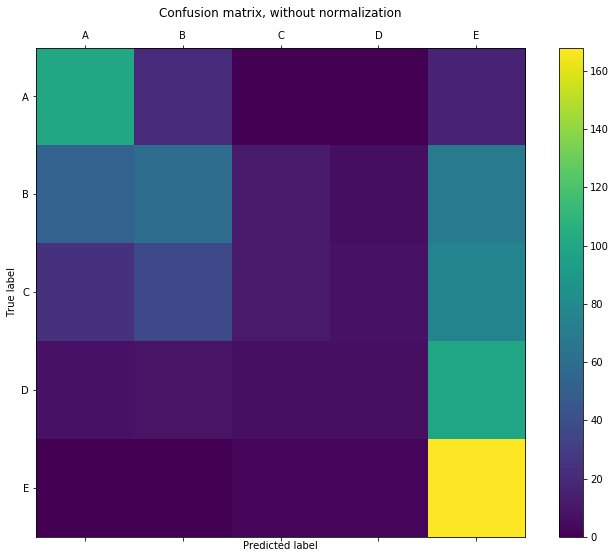

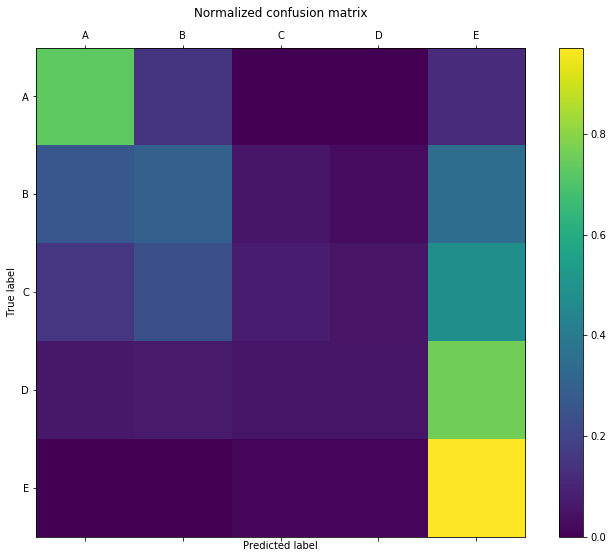

In [41]:
plt.rcParams["figure.figsize"] = [12,9]

cm = confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

labels = ['A','B','C','D','E']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix, without normalization')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_mrsort_pessimistic.jpg')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Normalized confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_norm_mrsort_pessimistic.jpg')

In [0]:
y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi)
  y_pred.append(pred)

In [43]:
(test_df['nutriscore'] == y_pred).mean()

0.37797246558197745

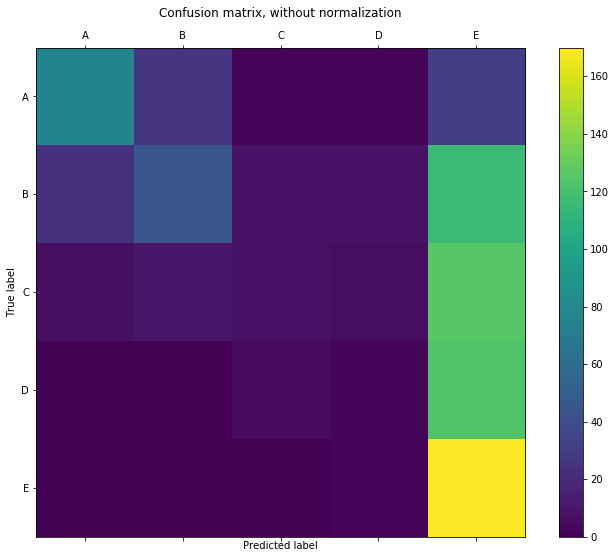

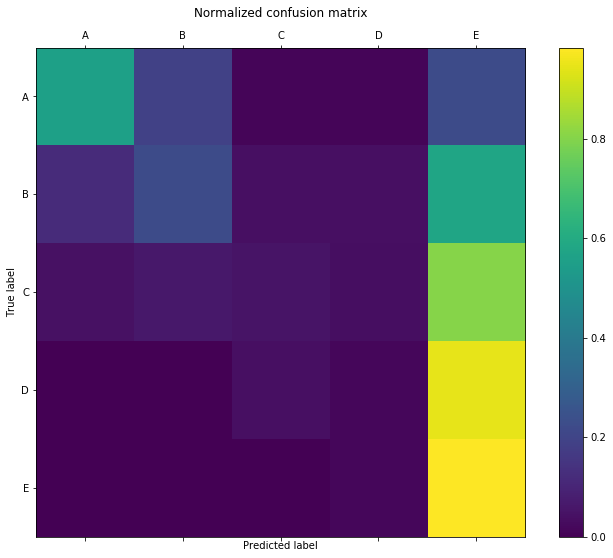

In [44]:
plt.rcParams["figure.figsize"] = [12,9]

cm = confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

labels = ['A','B','C','D','E']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix, without normalization')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_mrsort_optimistic.jpg')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Normalized confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_norm_mrsort_optimistic.jpg')

# Set the thesholds of the model manually

In [0]:
pi_2 = np.array([
                 [7510, 100, 100, 0, 0, 100],
                 [2009.9287999838757, 13.665507455827129, 33.394564151406406, 4.6768, 13.762, 2],
                 [1663.6701553788262, 7.0429976703970345, 22.053303416636737, 5.252, 18.3499, 1.2891238778338736],
                 [1446, 2.491991002779214, 13.354606049373178, 5.3, 19, 0.546764428138622],
                 [1205.146460873095, 1.1531811366411016, 8.106302920220942, 5.4, 20, 0.3882400255443486],
                 [0, 0, 0, 100, 100, 0]
])

# pi_2 = np.array([
#                  [7510, 100, 100, 0, 0, 100],
#                  [3698, 42, 100, 41, 41, 8],
#                  [3464, 60, 71, 27.0, 29, 19.52],
#                  [2920, 8.9, 67, 12.8, 27, 2.64],
#                  [2575, 6.2, 37, 47.8, 32, 5.2],
#                  [0, 0, 0, 100, 100, 0]
# ])

In [0]:
# pi_3 = np.array([
#                  [7510, 100, 100, 0, 0, 100],
#                  [2009.9287999838757, 13.665507455827129, 33.394564151406406, 11, 12.5, 4],
#                  [1663.6701553788262, 7.0429976703970345, 22.053303416636737, 12.5, 13.5, 3],
#                  [1446, 2.491991002779214, 13.354606049373178, 13.5, 14.5, 2],
#                  [1205.146460873095, 1.1531811366411016, 8.106302920220942, 14.5, 15.5, 1],
#                  [0, 0, 0, 100, 100, 0]
# ])

# pi_3 = np.array([
#                  [7510, 100, 100, 0, 0, 100],
#                  [1907, 21, 50, 4.6768, 13.762, 2],
#                  [1732, 20, 35.5, 5.252, 18.3499, 1.2891238778338736],
#                  [1460, 4.45, 33.5, 5.3, 19, 0.546764428138622],
#                  [1287, 3.1, 18.5, 5.4, 20, 0.3882400255443486],
#                  [0, 0, 0, 100, 100, 0]
# ])

In [0]:
y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi_2, 'pessimistic')
  y_pred.append(pred)

In [48]:
(test_df['nutriscore'] == y_pred).mean()

0.3854818523153942

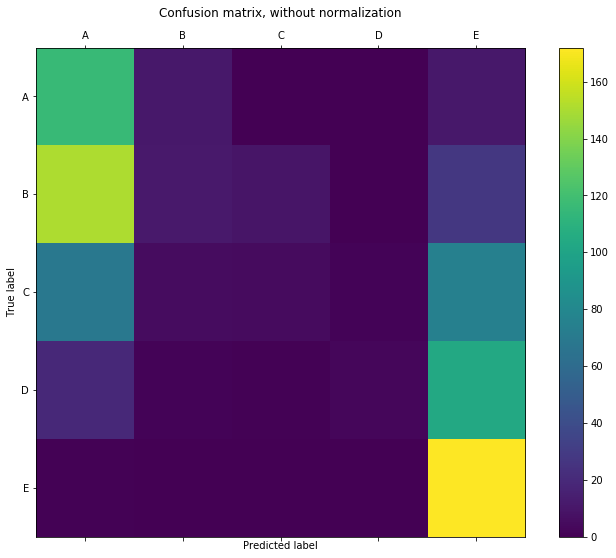

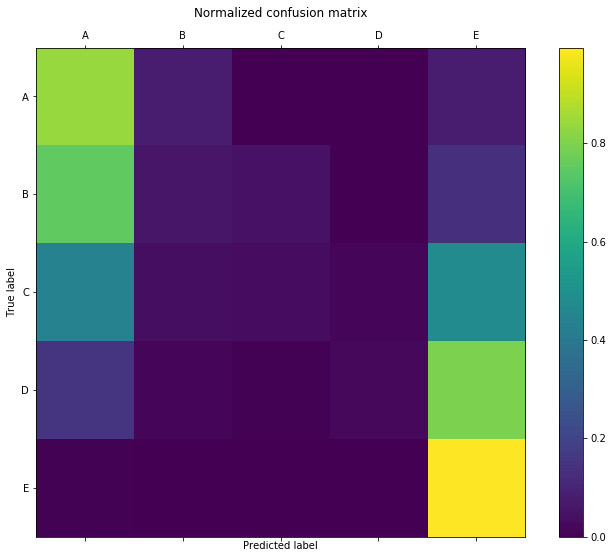

In [49]:
plt.rcParams["figure.figsize"] = [12,9]

cm = confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

labels = ['A','B','C','D','E']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix, without normalization')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_mrsort_pessimistic_manual.jpg')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Normalized confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_norm_mrsort_pessimistic_manual.jpg')

In [0]:
y_pred = []

for index, food in test_df.iterrows():
  pred = predict(food, pi_2)
  y_pred.append(pred)

In [51]:
(test_df['nutriscore'] == y_pred).mean()

0.3854818523153942

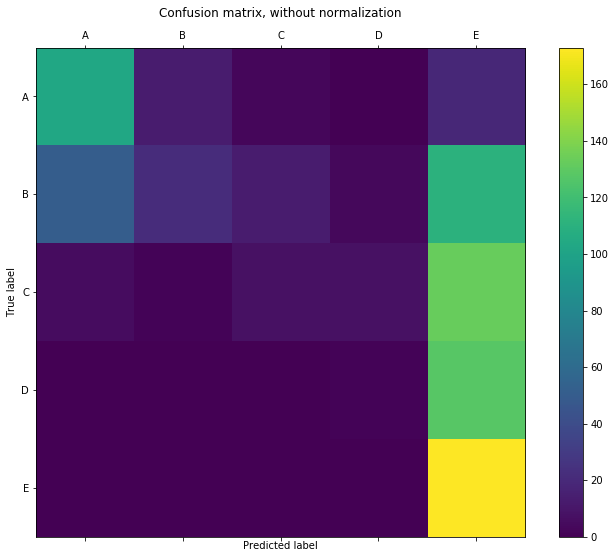

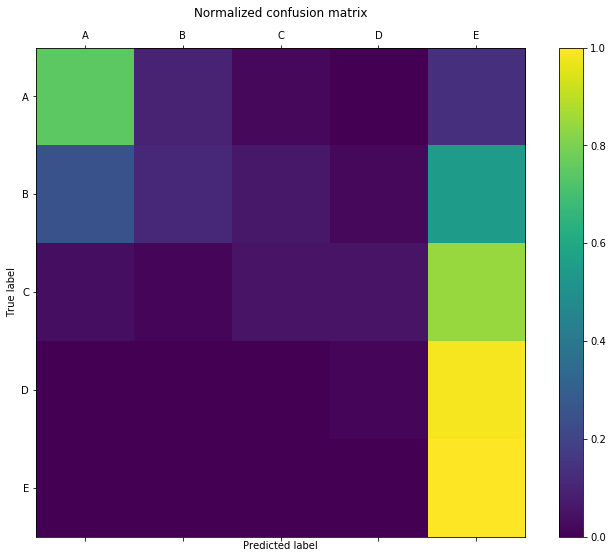

In [52]:
plt.rcParams["figure.figsize"] = [12,9]

cm = confusion_matrix(list(test_df['nutriscore']), y_pred, labels=[1,2,3,4,5])

labels = ['A','B','C','D','E']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix, without normalization')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_mrsort_optimistic_manual.jpg')

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_norm)
plt.title('Normalized confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix_norm_mrsort_optimistic_manual.jpg')